<a href="https://colab.research.google.com/github/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/DIP_00_02_Drawing%20Functions%20in%20OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing Functions in OpenCV

## Goal

OpenCV 를 이용하여 선,원, 사각형, 글자 등을 그리는 방법을 배운다.

* 실질적으로 다음의 함수들을 사용하는 법을 배운다. : 

    * `cv2.line()`
    * `cv2.circle()`
    * `cv2.rectangle()`
    * `cv2.ellipse()`
    * `cv2.putText()`

## Code

우리가 다루게 될 function들에서 자주 등장하는 common argument는 다음과 같음.

* `img` : 실제로 우리가 그리는 도형이나 글자가 그려질 image 객체
* `color` : 도형이나 글자의 색. 칼러 이미지의 경우 BGR로 지정되고, gray-scale인 경우는 scalar값으로 처리 가능함.
* `thickness` : 도형 등의 line(선)의 두께. 만일 `-1`이 넘겨질 경우 채워줘서 그려짐 (또는 `cv2.FILLED`로 지정). *default thickness = `1`*
* `lineType` : 선의 형태, `cv2.LINE_4`(4-connected), `cv2.LINE_8`(8-connected), `cv2.LINE_AA` (anti-aliased line) 중 에 고름.  *default line type = `cv2.LINE_8`*.    

## Drawing Line

`cv2.line`을 이용하여 라인을 그린다. 시작점과 끝점, 선의 두께, 색 등을 argument로 넘겨줌.

다음 예제를 보자.



In [2]:
import numpy as np
import cv2

# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv2.line(img,
               (0,0),       # pnt0
               (511,511),   # pnt1
               (255,0,0),   # color
               5            # thickness
               )


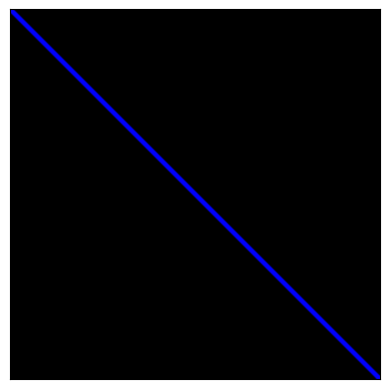

In [3]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

# Drawing Rectangle

사각형을 그리기 위해서, **top-left corner**와  **bottom-right corner of rectangle** 를 argument로 넘겨줌.

다음 예제를 참고하라.

In [4]:
img = cv2.rectangle(img,       # 그려지는 대상. 
                    (384,0),   # top-left
                    (510,128), # bottom-right
                    (0,255,0), # color, BGR
                    3          # thickness
                    )

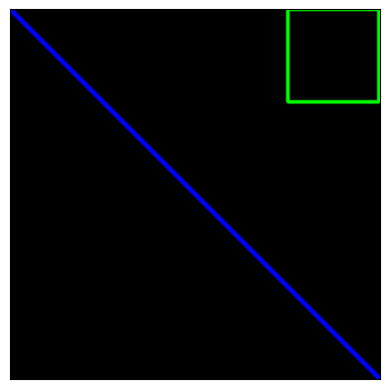

In [5]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

# Drawing Circle

* 원을 그리는 경우,  `center`의 좌표와 `radius`를 argument로 넘겨줌.

다음 예제를 보자.

In [6]:
img = cv2.circle(img,         # target image
                 (447,63),    # center
                 63,          # radius
                 (0,0,255),   # color
                 cv2.FILLED,  # thickness : -1 means cv2.FILLED
                 )

In [7]:
print(f'{cv2.FILLED:d}')

-1


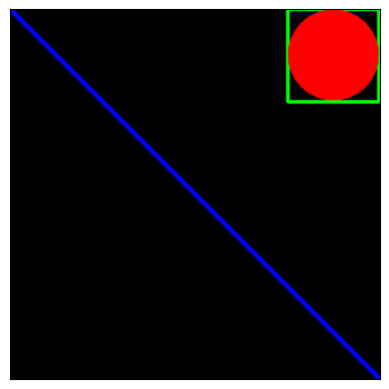

In [8]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

# Drawing Ellipse

타원(ellipse)을 그리기 위한 arguments는 다음과 같음. 

* 타원의 중점 좌표 : `(x,y)`. 
* 타원의 장축과 단축의 길이 : `(major axis length, minor axis length)`.
* 타원의 회전 각도 : `angle` (**anti-clockwise direction**). 
* 타원의 arc (호)를 그리기 위한 시작각과 끝각을 argument로 받음 : `startAngle` and `endAngle` (clockwise direction, degree).

> For more details, check the documentation of `cv2.ellipse()`. 

![](https://github.com/dsaint31x/OpenCV_Python_Tutorial/blob/master/DIP/images/cv2_ellipse.png?raw=1)

다음 예제를 살펴보자.

In [19]:
# img = np.zeros((512,512,3), np.uint8)
img = cv2.ellipse(img,
                  (256,256), # center
                  (100,50),  # major axis length, minor axis length
                  90,         # rotaion angle (CCW)
                  45,        # start angle (CCW)
                  180,       # end angle (CCW)
                  255,       # color (gray-scale or [255,0,0]과 같음.) 
                  -1         # filled 
                  )

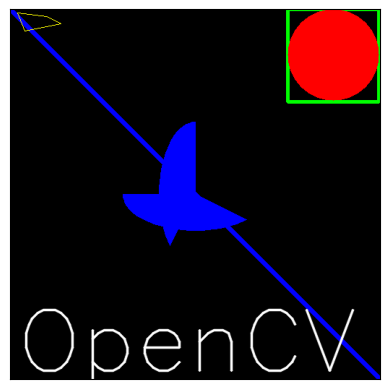

In [20]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,
        #    cmap='gray', 
        #    interpolation='bicubic'
           )
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

# Drawing Polygon

다각형을 그리는 방법은 다음과 같음.

* 우선 각 vertex의 좌표들의 ndarray를 생성. (`rows x 2`)
* 해당 ndarray를 `rows x 1 x 2` 로 reshape를 시킨다. `rows`는 vertex들의 숫자에 해당.  
* 해당 ndarray는 `int32` 를 dtype로 가짐.

> 사실, 위의 내용은 tutorial의 내용이나, 실제로 reshape를 하지 않고도 동작함.

다음의 예제를 참고.

In [11]:
pts = np.array([[10,5],[20,30],[70,20],[50,10]], 
               np.int32)
print(pts.shape)

# pts = pts.reshape((-1,1,2))
print(pts.shape)

img = cv2.polylines(img,        # target image
                    [pts],      # vertices
                    True,       # isClosed (닫혔는지여부)
                    (0,255,255),# color
                    1,          # thickness
                    )

(4, 2)
(4, 2)


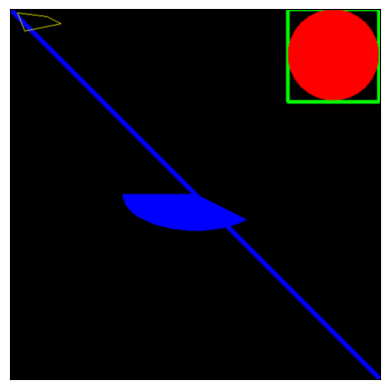

In [12]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

> **Note**  
>
> If third argument is `False`, you will get a polylines joining all the points, **not a closed shape**.  


In [13]:
test_img = np.zeros((50,80,3), np.uint8)
test_img = cv2.polylines(test_img,[pts],False,(0,255,255))

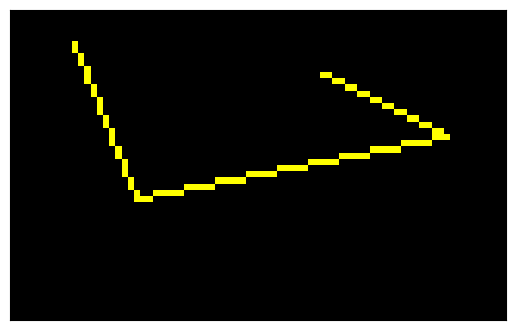

In [14]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = test_img[:,:,::-1] # faster version.
plt.imshow(img2,
        #    cmap='gray', 
        #    interpolation='bicubic'
           )
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

> # Note
>
> `cv2.polylines()` can be used to draw multiple lines.  
>
> Just create a list of all the lines you want to draw and pass it to the function. All lines will be drawn individually.  
> It is more better and faster way to draw a group of lines than calling `cv2.line()` for each line.

여러 라인을 그리는 용도로 사용하는 경우도 많다.

In [15]:
pts0 = np.array(
    [[3,3],[3,13]]
    ,np.int32).reshape(-1,1,2)
pts1 = np.array(
    [[10,3],[10,13]]
    , np.int32).reshape(-1,1,2)
pts2 = np.array(
    [[17,3],[17,13]]
    , np.int32).reshape(-1,1,2)
print(np.array([pts0,pts1,pts2]).shape)
test_img = np.zeros((50,80,3), np.uint8)
test_img = cv2.polylines(test_img,[pts0,pts1,pts2],False,(0,255,255))


(3, 2, 1, 2)


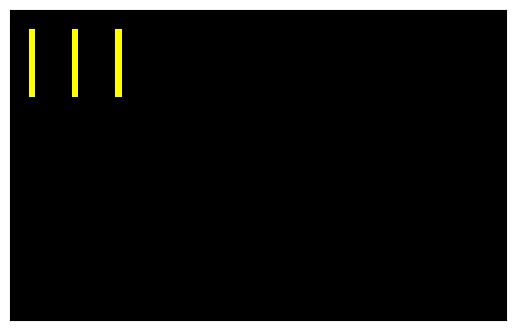

In [16]:
img2 = test_img[:,:,::-1] # faster version.
plt.imshow(img2,
           #cmap='gray',
           #interpolation='bicubic'
           )
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

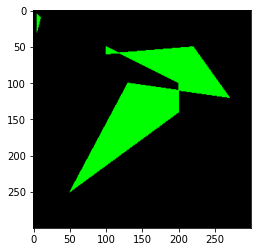

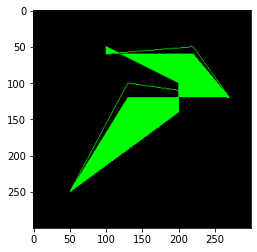

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

src = np.zeros((300, 300, 3), dtype=np.uint8)

img = src.copy()
points = np.array(
    [[100, 50], [200, 100], 
     [200, 140], [50, 250], [130,100], 
     [270, 120], [220, 50],
     [100, 60]
     ])
points_a = np.array([[5,5], [10,10], [5,30]])

cv2.fillPoly(img, [points,points_a], color=(0, 255, 0))
plt.imshow(img)

img = src.copy()
cv2.fillConvexPoly(img, points, color=(0, 255, 0))
plt.figure()
plt.imshow(img)




(104, 2)


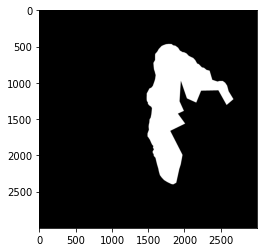

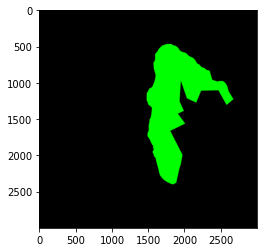

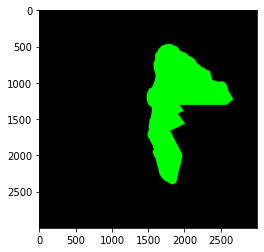

In [ ]:
src = np.zeros((3000, 3000, 3), dtype=np.uint8)
img = src.copy()

points = np.array([
   [2148,  687],[2120,  658],[2100,  650],[2062,  631],
   [2028,  596],[1994,  580],[1978,  580],[1938,  557],[1914,  519],
   [1877,  491],[1845,  485],[1825,  468],[1785,  466],[1747,  470],
   [1716,  481],[1687,  494],[1648,  535],[1626,  573],[1598,  604],
   [1597,  640],[1597,  687],[1574,  727],[1578,  782],[1582,  816],
   [1593,  849],[1597,  866],[1605,  895],[1598,  947],[1589,  978],
   [1566, 1043],[1546, 1067],[1518, 1080],[1506, 1104],[1482, 1148],
   [1481, 1227],[1484, 1251],[1498, 1271],[1498, 1289],[1514, 1310],
   [1544, 1331],[1554, 1350],[1546, 1433],[1536, 1481],[1521, 1504],
   [1518, 1548],[1510, 1579],[1508, 1606],[1512, 1647],[1493, 1698],
   [1493, 1739],[1504, 1752],[1525, 1784],[1548, 1836],[1557, 1853],
   [1574, 1872],[1567, 1889],[1581, 1917],[1563, 1946],[1566, 1971],
   [1577, 1978],[1577, 1998],[1585, 2014],[1602, 2032],[1621, 2112],
   [1631, 2147],[1642, 2184],[1647, 2213],[1663, 2271],[1688, 2305],
   [1720, 2339],[1763, 2366],[1821, 2394],[1846, 2399],[1888, 2376],
   [1930, 2185],[1946, 2136],[1951, 2117],[1974, 1993],[1805, 1662],
   [2010, 1562],[1910, 1425],[1993, 1387],[1933, 1255],[1951,  970],
   [2035, 1215],[2163, 1273],[2230, 1109],[2468, 1104],[2581, 1306],
   [2675, 1226],[2609, 1118],[2588, 1040],[2561, 1000],[2528,  976],
   [2484,  976],[2456,  984],[2384,  960],[2347,  834],[2306,  824],
   [2269,  794],[2242,  789],[2198,  744],[2176,  736],[2173,  731]])

print(points.shape)
img = cv2.drawContours(img, [points], -1, (255,255,255), thickness=-1)
plt.figure()
plt.imshow(img)

cv2.fillPoly(img, [points], color=(0, 255, 0))
plt.figure()
plt.imshow(img)

img = src.copy()
cv2.fillConvexPoly(img, points, color=(0, 255, 0))
plt.figure()
plt.imshow(img)


## Adding Text to Images:

image에 글자를 추가하려면 다음과 같이 처리한다.

* 우선 글자에 해당하는 문자열 데이터 생성.
* `bottom-left corner`로 해당 text 가 놓일 위치를 지정.
* `Font type` 을 지정. (Check `cv2.putText()` docs for supported fonts)
* `Font Scale` 을 지정. (specifies the size of font)
* `color`, `thickness`, `lineType` 등을 지정.

> For better look, `lineType = cv2.LINE_AA` is recommended.

다음 예제를 참고하라.

In [17]:
font = cv2.FONT_HERSHEY_SIMPLEX
img = cv2.putText(img,
                  'OpenCV',       # text
                  (10,500),       # location
                  font,           # font Type
                  4,              # font size
                  (255,255,255),  # color
                  2,              # thickness
                  cv2.LINE_AA     # lineType
                  )

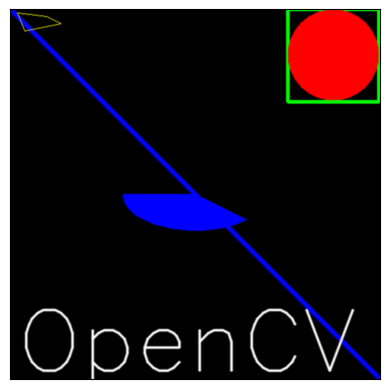

In [18]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,cmap='gray', interpolation='bicubic')
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis
plt.show()

## Result

결과 이미지.

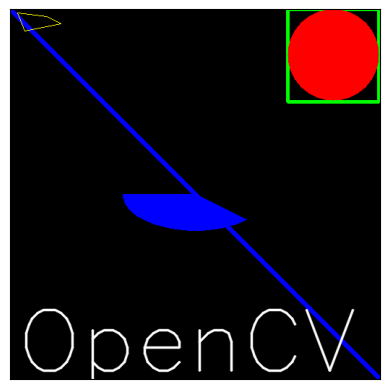

In [ ]:
from matplotlib import pyplot as plt

# b,g,r = cv2.split(img)
# img2 = cv2.merge([r,g,b])
img2 = img[:,:,::-1] # faster version.
plt.imshow(img2,
        #    cmap='gray', 
        #    interpolation='bicubic'
           )
plt.xticks([]); plt.yticks([]) # to hide tick values on X and Y axis

plt.show()

## Additional Resources

The angles used in ellipse function is not our circular angles.

* Starting angle and ending angle are measured in arc-angles from an ellipse, not from a circle. 
* The phenomen is visualized in paragraph (59) of http://mathworld.wolfram.com/Ellipse.html . 

visit this discussion : (https://answers.opencv.org/question/14541/angles-in-ellipse-function/)